# Exploring the Data
This is using Austin data. Looks like inside aribnb data is same format so it can be used for other cities


In [1]:
import io
import re
import numpy as np;
import pandas as pd;
import matplotlib;
import matplotlib.pyplot as plt;
import seaborn as sns;

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read data, specify index so it's easier to join and search using loc
listings = pd.read_csv('data/austin-airbnb/listings.csv', index_col = 'id')

In [46]:
#shape
listings.shape

(11520, 105)

In [47]:
#to get all columns, set option
pd.set_option('display.max_columns', 107)
#to get text with no truncation
pd.set_option('display.max_colwidth', -1)

In [128]:
#get all columns exported into a file
buffer = io.StringIO()
listings.info(buf=buffer, verbose=True, null_counts=True)
s = buffer.getvalue()

with open('listings_info.txt', 'w',encoding="utf-8") as f:
    f.write(s)

In [145]:
#clean up exported file from above so it can be imported to dataframe easily
with open('listings_info.txt', 'r') as f:
    lines = f.readlines()
with open('listings_info_clean.txt', 'w') as f:
    line_number = 0
    for line in lines:
        line_number = line_number + 1
        if line_number not in [1,2,3,109,110]:
            line1 = re.sub(' +', ' ', line)
            f.write(line1)

In [158]:
#read the output from cell above to data frame so it can be queried later
listing_columns = pd.read_csv("listings_info_clean.txt", delimiter=' ', header=None)

In [159]:
listing_columns.head()

,0,1,2,3
0,listing_url,11520,non-null,object
1,scrape_id,11520,non-null,int64
2,last_scraped,11520,non-null,object
3,name,11520,non-null,object
4,summary,11124,non-null,object


In [174]:
#filter columns with mostly blanks
filt = listing_columns[1]  < 7000
listing_columns[filt]

,0,1,2,3
9,notes,5540,non-null,object
11,access,6750,non-null,object
14,thumbnail_url,0,non-null,float64
15,medium_url,0,non-null,float64
17,xl_picture_url,0,non-null,float64
39,neighbourhood_group_cleansed,0,non-null,float64
58,square_feet,193,non-null,float64
60,weekly_price,888,non-null,object
61,monthly_price,747,non-null,object
93,license,39,non-null,object


In [175]:
#fcolumns with objecs and high counts
filt_object = listing_columns[3] == 'object'
filt_highcount = listing_columns[1] > 7000
listing_columns[filt_object][filt_highcount]

,0,1,2,3
0,listing_url,11520,non-null,object
2,last_scraped,11520,non-null,object
3,name,11520,non-null,object
4,summary,11124,non-null,object
5,space,8962,non-null,object
6,description,11333,non-null,object
7,experiences_offered,11520,non-null,object
8,neighborhood_overview,7809,non-null,object
10,transit,7200,non-null,object
12,interaction,7690,non-null,object


In [16]:
#looking at different text value for possible text analysis
filt = (listings['description'].notna()) & (listings['description'] != 'none')
listings.loc[filt, 'description'].head(1)

id
2265    Zen East is situated in a vibrant & diverse mu...
Name: description, dtype: object

In [59]:
#show all columns for one listing
listings.loc[702825]

listing_url                                     https://www.airbnb.com/rooms/702825                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [5]:
#availability for 702825?
calendar = pd.read_csv('data/austin-airbnb/calendar.csv')
filt = calendar['listing_id'] == 702825
calendar[filt].head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,702825,2020-02-19,f,$260.00,$260.00,3,120
1,702825,2020-02-20,f,$260.00,$260.00,3,120
2,702825,2020-02-21,f,$275.00,$275.00,3,120
3,702825,2020-02-22,f,$275.00,$275.00,3,120
4,702825,2020-02-23,f,$260.00,$260.00,3,120


In [6]:
#review for 702825, comments doesn't indicate postive or negative
reviews = pd.read_csv('data/austin-airbnb/reviews.csv')
filt = reviews['listing_id'] == 702825
reviews[filt].head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
29272,702825,3400312,2013-01-23,4168467,Edward,We had a longer-term stay at Larry's place.\r\...
29273,702825,3780244,2013-03-14,2102026,Lorena,"Larrys home was spacious and beautiful, with a..."
29274,702825,4379954,2013-05-01,4591113,Alex,We had a lovely (Email hidden by Airbnb) munic...
29275,702825,5605942,2013-07-08,6531262,Joseph,"A very nice, modern, and spacious home located..."
29276,702825,6078576,2013-07-29,1972287,Trish,Larry was a fabulous host. He left lots of goo...


In [71]:
#data shape
print('listings: ' + str(listings.shape))
print('calendar: ' + str(calendar.shape))
print('reviews: ' + str(reviews.shape))

listings: (11520, 105)
calendar: (4204800, 7)
reviews: (359504, 6)


In [72]:
#new df with only int and float columns, exclude object type
listings_int_float = listings.select_dtypes(exclude=['object'], );
listings_int_float.head()

,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2265,20200219033646,NaN,NaN,NaN,2466,3.0,3.0,78702,NaN,30.27750,-97.71398,4,2.0,2.0,2.0,NaN,4,30,90,30,30,90,90,30.0,90.0,0,0,0,0,24,1,93.0,9.0,10.0,10.0,10.0,8.0,9.0,3,2,1,0,0.18
5245,20200219033646,NaN,NaN,NaN,2466,3.0,3.0,78702,NaN,30.27577,-97.71379,2,1.0,1.0,2.0,NaN,2,30,60,30,30,60,60,30.0,60.0,0,0,0,0,9,0,91.0,10.0,8.0,10.0,9.0,10.0,9.0,3,2,1,0,0.07
5456,20200219033646,NaN,NaN,NaN,8028,1.0,1.0,78702,NaN,30.26112,-97.73448,3,1.0,1.0,2.0,NaN,2,2,90,2,2,90,90,2.0,90.0,15,33,54,323,522,51,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,0,3.91
5769,20200219033646,NaN,NaN,NaN,8186,1.0,1.0,78729,NaN,30.45697,-97.78422,2,1.0,1.0,1.0,NaN,2,1,14,1,1,14,14,1.0,14.0,0,0,0,0,257,18,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,1,0,2.14
6413,20200219033646,NaN,NaN,NaN,13879,1.0,1.0,78704,NaN,30.24829,-97.73726,2,1.0,0.0,1.0,550.0,2,4,365,4,4,365,365,4.0,365.0,16,18,18,18,109,23,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,0,0.88


In [73]:
#new df, select only few
listings_select = listings[[#'id','scrape_id','host_id','host_listings_count',
                          'host_total_listings_count','neighbourhood_cleansed',
                          #'latitude','longitude',
                          'accommodates','bathrooms',
                          'bedrooms','beds','guests_included',
                          'minimum_nights','maximum_nights',
                          #'minimum_minimum_nights','maximum_minimum_nights',
                          #'minimum_maximum_nights','maximum_maximum_nights',
                          #'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
                          'availability_30','availability_60',
                          #'availability_90','availability_365',
                          'number_of_reviews','number_of_reviews_ltm'#,
                          #'review_scores_rating','review_scores_accuracy',
                          #'review_scores_cleanliness','review_scores_checkin',
                          #'review_scores_communication',
                          #'review_scores_location','review_scores_value','reviews_per_month',
                          #'calculated_host_listings_count',
                          #'calculated_host_listings_count_entire_homes',
                          #'calculated_host_listings_count_private_rooms',
                          #'calculated_host_listings_count_shared_rooms'
                         ]]



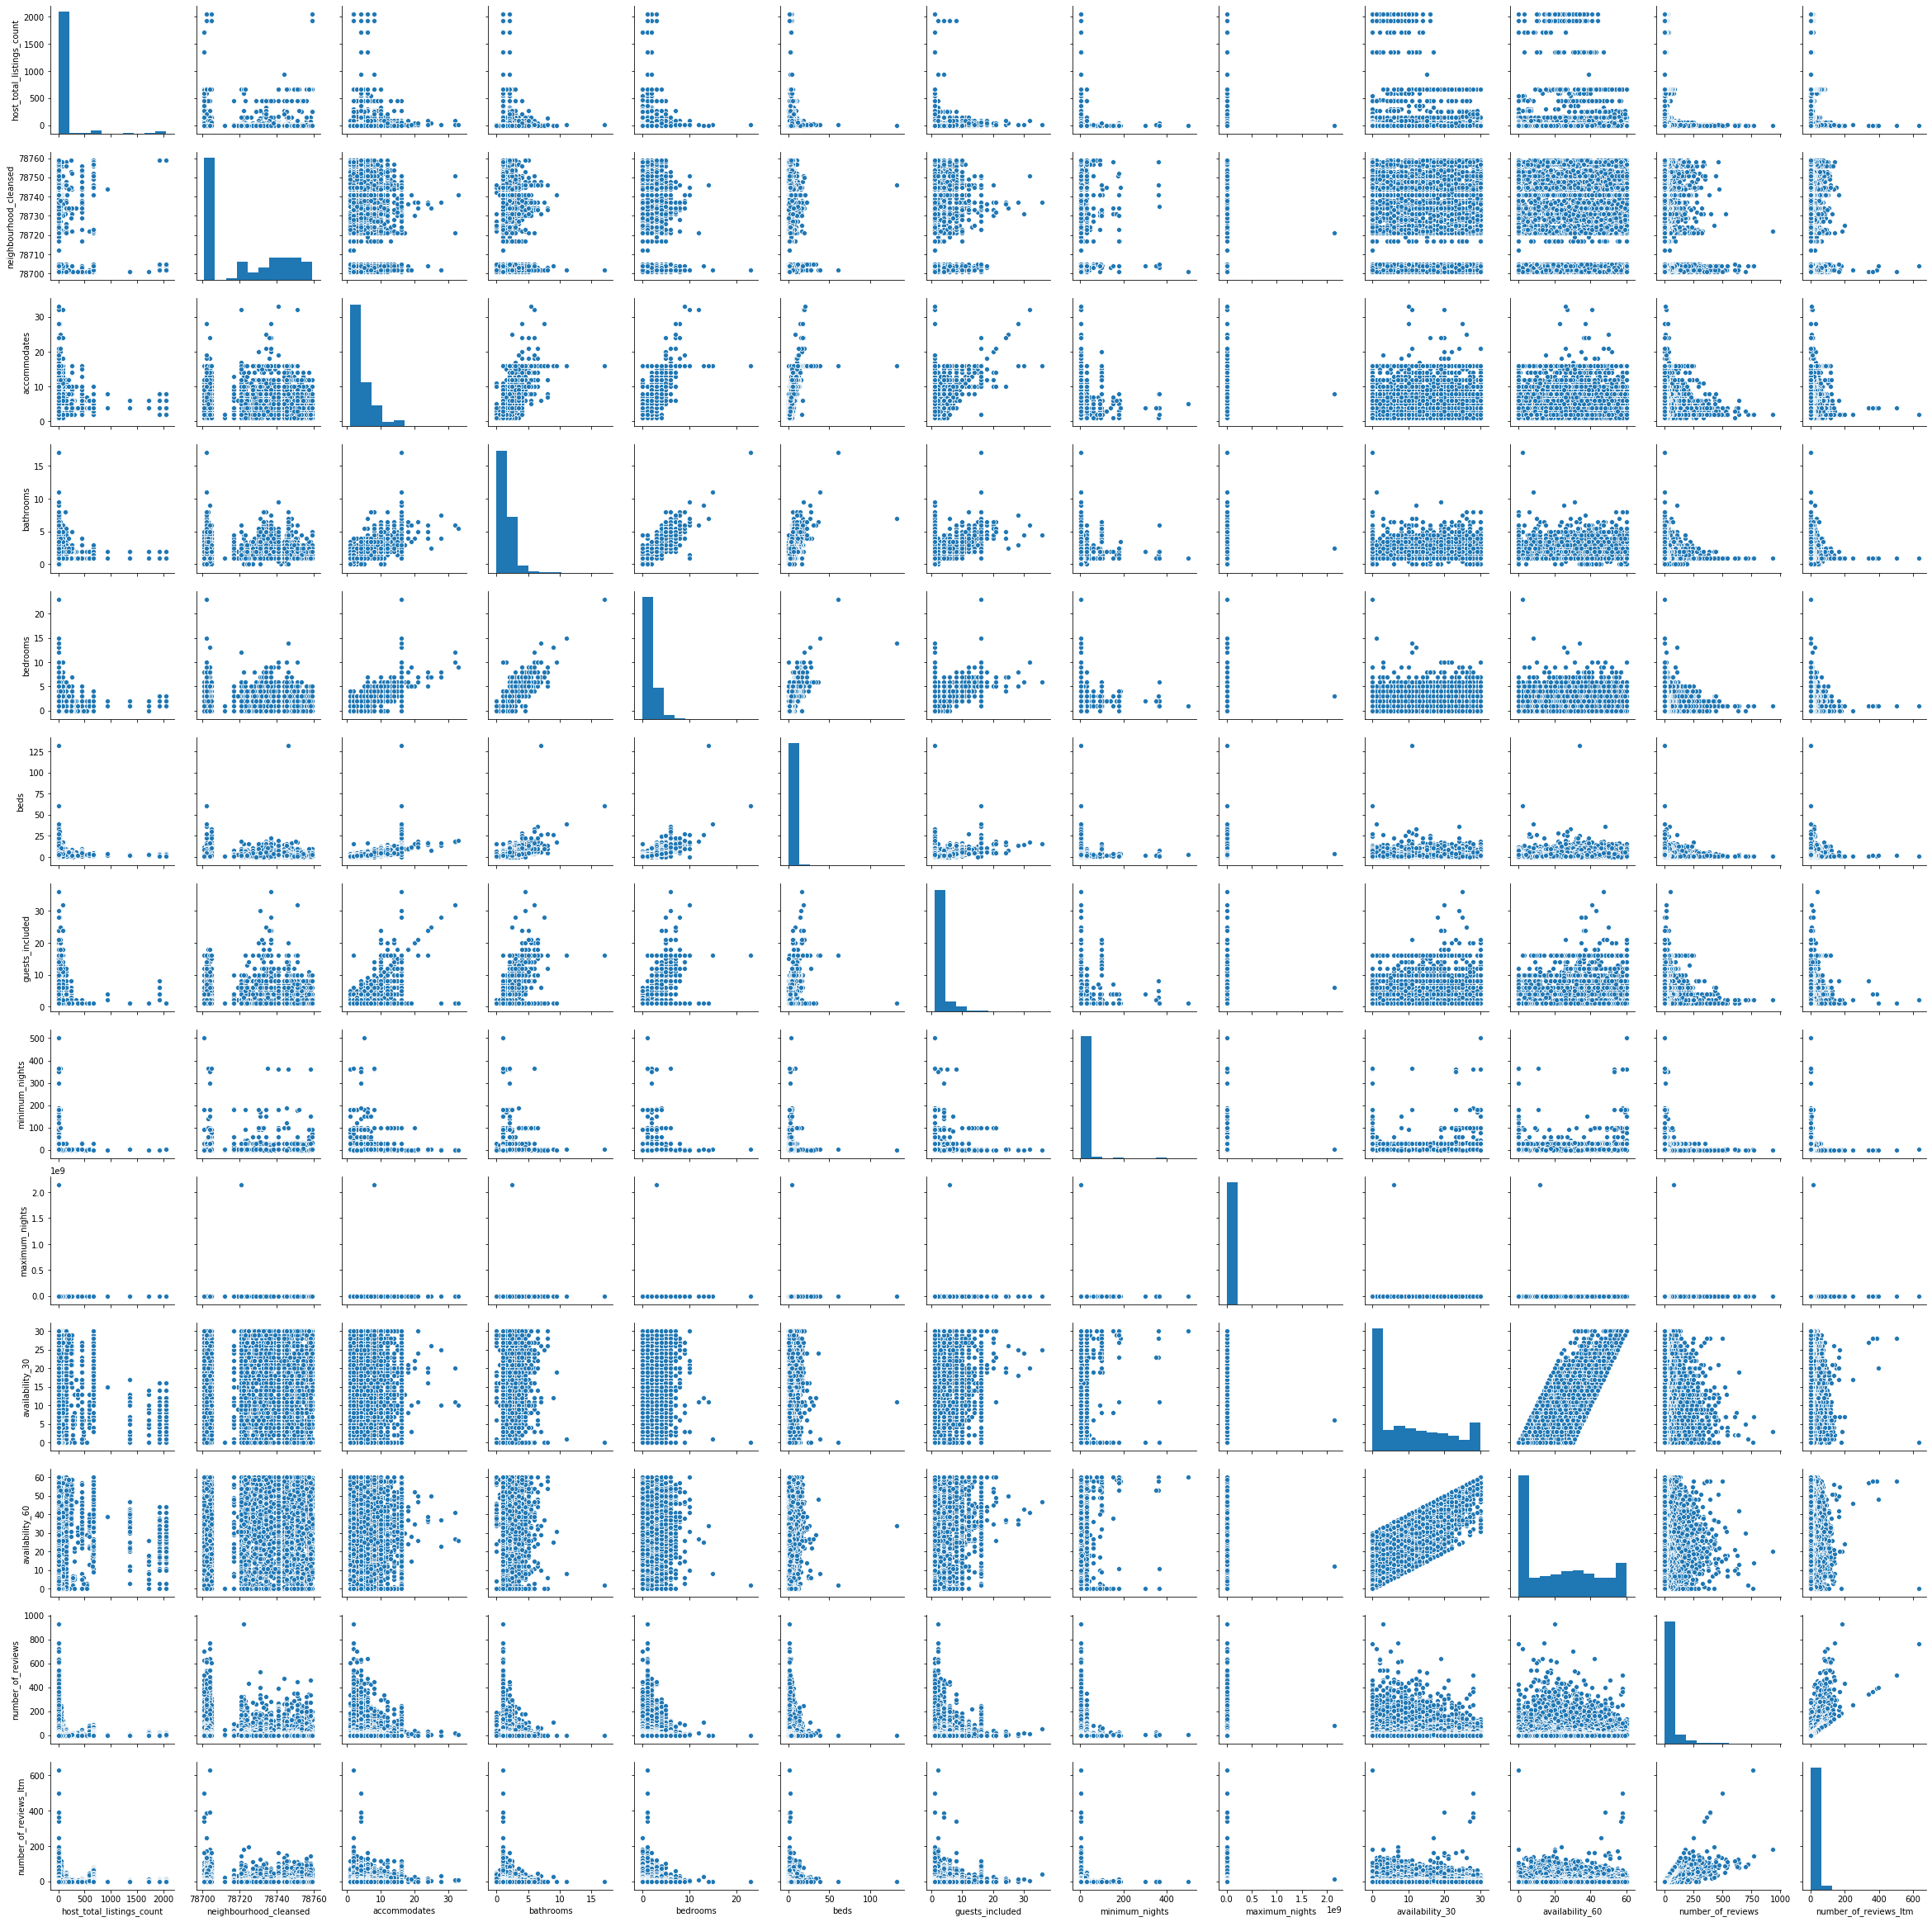

In [74]:
# Using the Seaborn Pairplot to get cross plots between different attributes
sns.pairplot(listings_select);

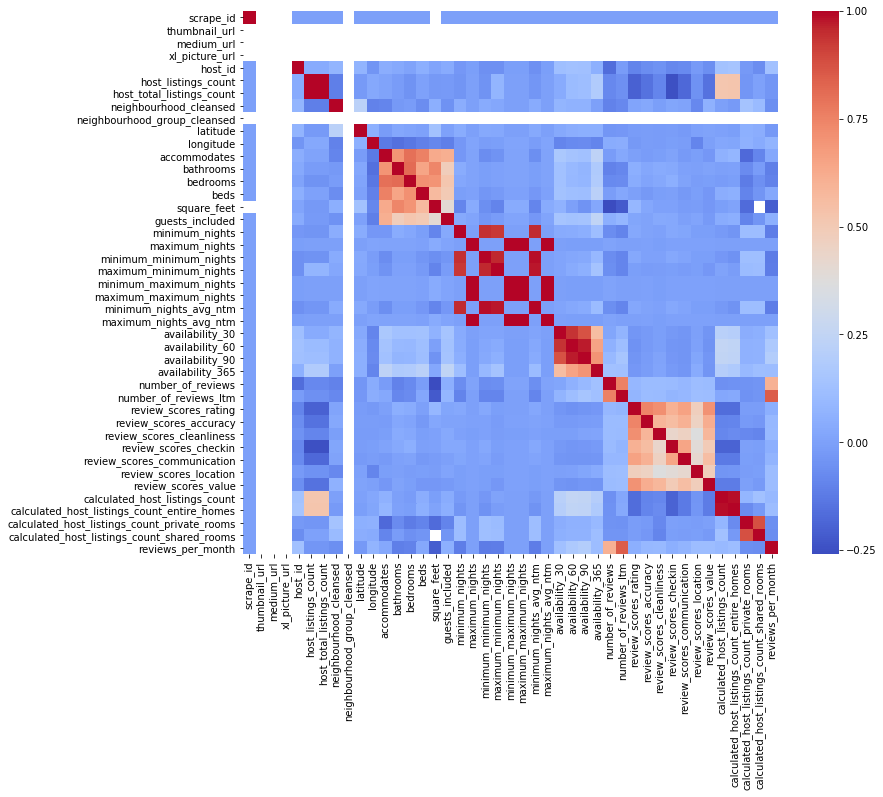

In [75]:
#heatmap for all int/float columns
plt.figure(figsize=(12,10))
correlations = listings_int_float.corr()
sns.heatmap(correlations,
           cmap='coolwarm');